In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from numba import cuda 

2023-02-27 21:57:45.549763: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#Verify if GPU is available

print(tf.config.list_physical_devices())
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-02-27 21:57:47.539990: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-27 21:57:47.540132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-27 21:57:47.573494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 21:57:47.573638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-02-27 21:57:47.573659: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-27 21:57:47.575120: I tensorflow/stream_executor/platform/de

In [3]:
#Reset the GPU memory

device = cuda.get_current_device()
device.reset()

In [4]:
#Download the dataset

mnist = tf.keras.datasets.mnist
(X_train, _), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
X_train[100].shape

(28, 28)

In [6]:
#Build the model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(units = 512, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 256, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 11, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 256, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 512, activation = 'relu'),
                                     tf.keras.layers.Dropout(rate = 0.2),
                                     tf.keras.layers.Dense(units = 784, activation = 'relu'),
                                     tf.keras.layers.Reshape((28, 28))])

2023-02-27 21:58:12.769819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 21:58:12.770132: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-27 21:58:12.770283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 21:58:12.770533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84G

In [7]:
#Compile the model

# model.compile(loss = 'mae', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
model.compile(loss = 'mae', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))
# model.compile(loss = 'mae', optimizer = 'adam')

In [8]:
#Train the model

history = model.fit(X_train, X_train, epochs = 20)

2023-02-27 21:58:16.630358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-27 21:58:16.648268: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


Epoch 1/20


2023-02-27 21:58:17.238239: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0910
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0855
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0829
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0812
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0799
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0792
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0786
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0780
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0777
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764
Epoch 13/20


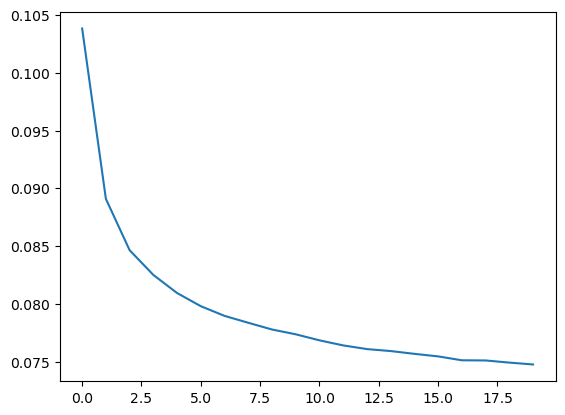

In [9]:
#Plot the evolution of objective(loss) function through the epochs

plt.plot(history.history['loss'])

In [10]:
model.evaluate(X_test, X_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0675


0.06754868477582932

In [43]:
#Get indices for every digit

# indices = np.random.randint(low = 0, high = 9999, size = 10)
# indices = np.array([3, 2, 1, 18, 4, 8, 11, 17, 61, 7])

indices = []

for i in range(10):
    index = np.argwhere(Y_test == i).squeeze()[40]
    indices.append(index)

print(indices)

[490, 288, 371, 450, 325, 395, 463, 383, 520, 394]


In [44]:
images = []
results = []

for i in indices:
    x = X_test[i]
    images.append(x)
    y = model.predict(x.reshape(1, 28, 28))
    results.append(y[0])

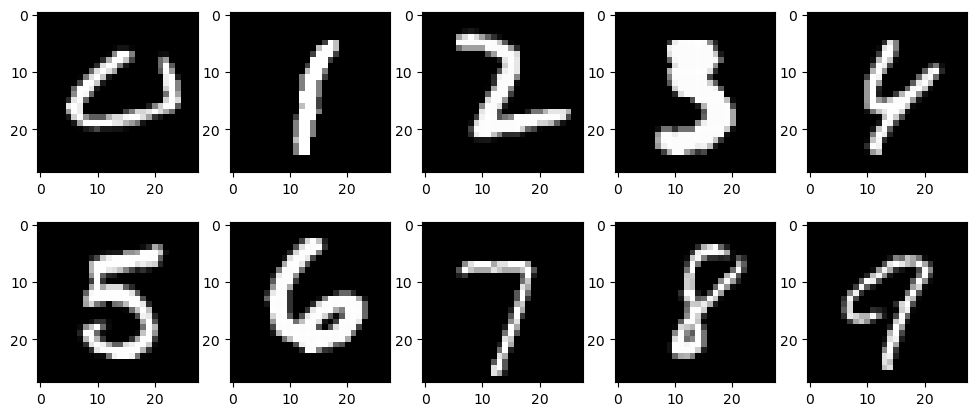

In [45]:
figure = plt.figure(figsize = (12, 5))
for i in range(10):
    figure.add_subplot(2, 5, i+1)
    plt.imshow(images[i], cmap = 'gray')

plt.show()

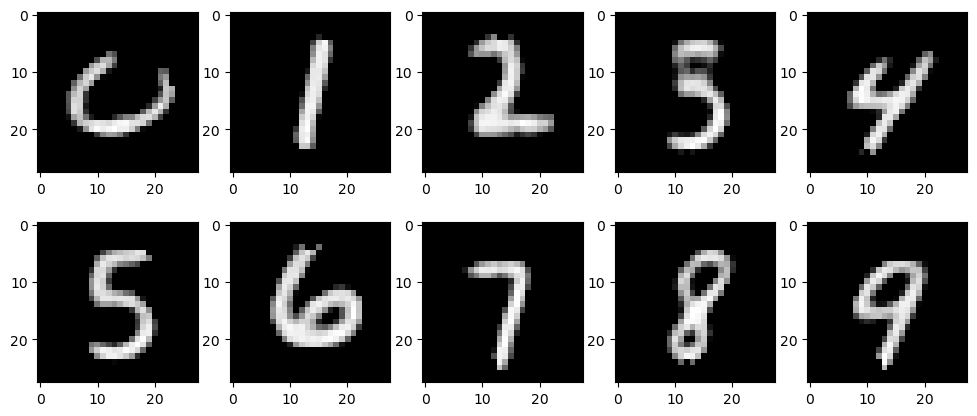

In [46]:
figure = plt.figure(figsize = (12, 5))
for i in range(10):
    figure.add_subplot(2, 5, i+1)
    plt.imshow(results[i], cmap = 'gray')

plt.show()

In [ ]:
# model = tf.keras.models.Sequential([Dense(units = 784, input_shape = [784]),
#                                     Dense(units = 512, activation = 'relu'),
#                                     Dense(units = 256, activation = 'relu'),
#                                     Dense(units = 128, activation = 'relu'),
#                                     Dense(units = 1, activation = 'relu'),
#                                     Dense(units = 128, activation = 'relu'),
#                                     Dense(units = 256, activation = 'relu'),
#                                     Dense(units = 512, activation = 'relu'),
#                                     Dense(units = 784, activation = 'relu'),
#                                     ])
# l1 = Input(shape = (784))
# l2 = Dense(units = 512, activation = 'relu')(l1)
# l3 = Dense(units = 256, activation = 'relu')(l2)
# l4 = Dense(units = 128, activation = 'relu')(l3)
# op = Dense(units = 11, activation = 'relu')(l4)
# l5 = Dense(units = 128, activation = 'relu')(op)
# l6 = Dense(units = 256, activation = 'relu')(l5)
# l7 = Dense(units = 512, activation = 'relu')(l6)
# l8 = Dense(units = 784, activation = 'relu')(l7)
# model = Model(inputs = [l1], outputs =[])